<a href="https://colab.research.google.com/github/BogdanDavidRomanovich/labs/blob/master/%D0%9C%D0%A1%D0%A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8


In [3]:
def create_df(RSS_next,numOfColX,yShape):
    df = pd.DataFrame(columns=['s', 'RSS', 'Cp', 'FPE'])
    Cp = RSS_next + 2 * numOfColX
    numOfRowY = yShape
    FPE = (numOfRowY + numOfColX) / (numOfRowY - numOfColX) * RSS_next
    df = df.append({'s': numOfColX, 'RSS': RSS_next, 'Cp': Cp, 'FPE': FPE},  ignore_index=True)
    return df
def RMNK(X, y, s=None, printt=False, cr_df=False):
    numOfColX = X.shape[1]
    if numOfColX > 1:
        if cr_df:
            w, H_inv, RSS, df = RMNK(X[:,:-1], y, s, printt, cr_df)
            if s is not None and numOfColX > s:
                return w, H_inv, RSS, df
        else:
            w, H_inv, RSS = RMNK(X[:,:-1], y, s, printt, cr_df)
            if s is not None and numOfColX > s:
                return w, H_inv, RSS
        
        h = (X[:,:-1].T @ X[:,-1]).reshape(-1,1) 
        η  = X[:,-1].T @ X[:,-1] 
        α = H_inv @ h 
        β  = η  - h.T @ α 
        β_inv = 1 /β  
        γ = X[:,-1].T @ y 
        ν =β_inv * (γ - h.T @ w) 
        w = np.vstack((w - ν * α, ν))  
        H_next_inv = np.vstack((np.hstack((H_inv + β_inv * α @ α.T, (- β_inv * α).reshape(-1, 1))),
                               np.hstack((-β_inv * α.T, β_inv))))
        RSS_next = (RSS - ν.flatten() ** 2 * β.flatten())[0]

    else: 
        H_inv = np.array([[0]])
        η  = β = X[:,-1].T @ X[:,-1]
        β_inv = 1 / β
        α = h = np.array([0])
        γ = X[:,-1].T @ y
        ν = np.array([β_inv * γ])
        w = np.array([ν])
        H_next_inv = np.array(β_inv).reshape(1, 1)
        RSS_next = (y.T @ y - y.T @ X[:,-1].reshape(-1, 1) @ w)[0]
        if cr_df:
            df = pd.DataFrame(columns=['s', 'RSS', 'Cp', 'FPE'])
        
    if printt:
        print('Step №{}'.format(numOfColX))
        '''print('h_{}:{}'.format(numOfColX, h.reshape(-1,1)[:,0]))
            print('η _{}:{}'.format(numOfColX, η ))
            print('α_{}:{}'.format(numOfColX, α.reshape(-1,1)[:,0]))
            print('β_{}:{}'.format(numOfColX, β))
            print('γ_{}:{}'.format(numOfColX, γ))
            print('ν_{}:{}'.format(numOfColX, ν))'''
        print('---θ{}: {}'.format(numOfColX, w[:, 0]))
        print('---H{}_inv:\n{}'.format(numOfColX, H_next_inv))
        print('---RSS{}: {}'.format(numOfColX, RSS_next))
    
    if cr_df:
        Cp = RSS_next + 2 * numOfColX
        numOfRowY = y.shape[0]
        FPE = (numOfRowY + numOfColX) / (numOfRowY - numOfColX) * RSS_next
        df = df.append({'s': numOfColX, 'RSS': RSS_next, 'Cp': Cp, 'FPE': FPE},  ignore_index=True)
        return w, H_next_inv, RSS_next, df
    return w, H_next_inv, RSS_next
  

Fergulst Model:
μ = 0.0001
k = 10
N0 = 100
Noise: C = 4
n = 100
t =[0;1000] with h=10



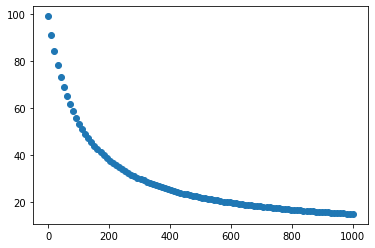

      i     t        N(t)        N^2(t)   N(t+1)
0     1     0  100.000000  10000.000000  99.1000
1     2    10   91.705134   8409.831579  90.9559
2     3    20   84.746199   7181.918243  84.1128
3     4    30   78.824789   6213.347354  78.2823
4     5    40   73.725211   5435.406776  73.2554
..  ...   ...         ...           ...      ...
95   96   959   15.261184    232.903728  15.2532
96   97   969   15.180913    230.460134  15.1730
97   98   979   15.102277    228.078781  15.0946
98   99   989   15.025230    225.757532  15.0177
99  100  1000   14.949727    223.494342  14.9423

[100 rows x 5 columns]
RMNKO:
Step №1
---θ1: [0.99550587]
---H1_inv:
[[8.46186225e-06]]
---RSS1: 0.8488937635265756
Step №2
---θ2: [ 1.00099975e+00 -9.99949621e-05]
---H2_inv:
[[ 4.40171822e-05 -6.47148226e-07]
 [-6.47148226e-07  1.17788513e-08]]
---RSS2: 8.289787345461264e-08
True values/estimates:θ_1 = 1.001 θ_2 = -0.0001 θ_1* = 1.00099974909995 θ_2* = -9.999496212140512e-05
True values/estimates: μ = 0.00

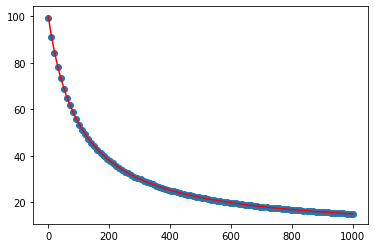

,C,n,θ_1*,θ_2*,μ*,k*
0,2.0,20.0,1.001003,-0.000100,0.000100,10.037421
1,2.0,50.0,1.001025,-0.000101,0.000101,10.196492
2,2.0,70.0,1.001015,-0.000100,0.000100,10.132916
3,5.0,20.0,1.001000,-0.000100,0.000100,10.000571
4,5.0,50.0,1.001000,-0.000100,0.000100,10.000262
5,5.0,70.0,1.001000,-0.000100,0.000100,10.000038
6,10.0,20.0,1.001000,-0.000100,0.000100,10.000000
7,10.0,50.0,1.001000,-0.000100,0.000100,10.000000
8,10.0,70.0,1.001000,-0.000100,0.000100,10.000000


In [4]:
def Fergulst(N, t, μ, k):
    return μ * N * (k - N)
def findtheta(μ,k):
    theta1 = μ * k + 1
    theta2 = -μ
    return np.array([theta1, theta2])
def findparams(theta1, theta2):
    μ = - theta2
    k = (1 - theta1) / theta2
    return μ, k

k = 10
μ = 0.0001
N0 = 100
t_start = 0
t_end = 1000
n = 100
n_list = [20, 50, 70]
C = 4
C_list = [2, 5, 10]
theta = findtheta(μ,k)
h = int((t_end - t_start) / (n - 1))
t = np.linspace(t_start, t_end, num=n)
N = odeint(Fergulst, N0, t, (μ, k))
df = pd.DataFrame()
df['i'] = range(1, n+1)
df['t'] = list(map(int, t))
df['N(t)'] = N.flatten()
df['N^2(t)'] = np.square(N.flatten())
df['N(t+1)'] = np.array(df[['N(t)','N^2(t)']]) @ theta
df['N(t+1)'] = np.round(df['N(t+1)'], C)
X = np.array(df[['N(t)', 'N^2(t)']])
y = np.array(df['N(t+1)'])
print('Fergulst Model:\nμ = {}\nk = {}\nN0 = {}'.format(μ, k, N0))
print('Noise: C = {}'.format(C))
print('n = {}'.format(n))
print('t =[{};{}] with h={}\n'.format(t_start,t_end,h))
plt.scatter(t, y)
plt.show()
print(df)
print('RMNKO:')
theta_est = RMNK(X, y, printt=True)[0][:,0]
μ_est, k_est = findparams(*theta_est)
print('True values/estimates:θ_1 = {} θ_2 = {} θ_1* = {} θ_2* = {}'.format(*theta,*theta_est))
print('True values/estimates: μ = {} k = {} μ* = {} k* = {}'.format(μ, k, μ_est, k_est))
plt.scatter(t, y)
t_plot = np.linspace(t_start, t_end, num=n * 10)
plt.plot(t_plot, odeint(Fergulst, N0, t_plot, (μ_est, k_est)), 'r')
plt.show()
param_df = pd.DataFrame(columns=['C', 'n', 'θ_1*', 'θ_2*', 'μ*', 'k*'])
for C in C_list:
    for n in n_list: 
        h = int((t_end - t_start) / (n - 1))
        t = np.linspace(t_start, t_end, num=n)
        N = odeint(Fergulst, N0, t, (μ, k))
        df = pd.DataFrame()
        df['i'] = range(1, n+1)
        df['t'] = list(map(int, t))
        df['N(t)'] = N.flatten()
        df['N^2(t)'] = np.square(N.flatten())
        df['N(t+1)'] = np.array(df[['N(t)','N^2(t)']]) @ theta
        df['N(t+1)'] = np.round(df['N(t+1)'], C)
        X = np.array(df[['N(t)', 'N^2(t)']])
        y = np.array(df['N(t+1)'])
        theta_est = RMNK(X, y, printt=False)[0][:,0]
        μ_est, k_est = findparams(*theta_est)
        param_df = param_df.append({'C': C, 'n': n,'θ_1*': theta_est[0], 'θ_2*': theta_est[1],'μ*': μ_est, 'k*': k_est},ignore_index=True)
param_df


δ = 0.005 ω0^2 = 0.01 x0 = 5 x00 = 2
C = 2
n = 100
t =[0;1000] with h=10



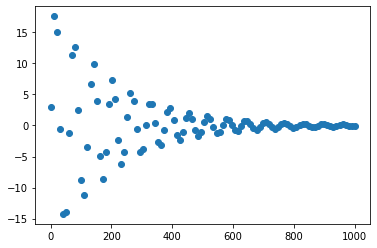

      i     t       x(t)     x(t+1)  x(t+2)
0     1     0   5.000000   7.000000    2.97
1     2    10  18.845271  19.939029   17.58
2     3    20  14.574472  13.874824   15.12
3     4    30  -2.267788  -3.965348   -0.56
4     5    40 -15.471944 -16.559489  -14.24
..  ...   ...        ...        ...     ...
95   96   959   0.166296   0.166775    0.16
96   97   969   0.048257   0.035219    0.06
97   98   979  -0.101425  -0.115068   -0.09
98   99   989  -0.146385  -0.148422   -0.14
99  100  1000  -0.056637  -0.046370   -0.07

[100 rows x 5 columns]
RMNKO
Step №1
---θ1: [0.95814633]
---H1_inv:
[[0.00045498]]
---RSS1: 19.32925232365642
Step №2
---θ2: [ 1.98091079 -0.9906825 ]
---H2_inv:
[[ 0.05457455 -0.05242195]
 [-0.05242195  0.05077759]]
---RSS2: 0.0008069832270756194
true values/estimates:θ_1 = 1.98019801980198 θ_2 = -0.9900990099009901 θ_1* = 1.980910789519657 θ_2* = -0.9906825049560534
true values/estimates: δ = 0.005 ω0^2 = 0.01 δ* = 0.004702563635339385 ω0^2* = 0.009863619663728285


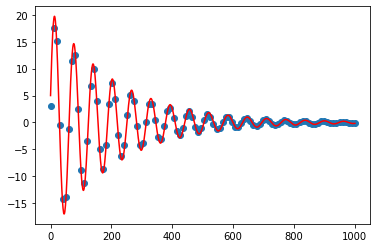

,C,n,θ_1*,θ_2*,δ*,ω0_sqr*
0,2.0,20.0,1.978366,-0.988289,0.005925,0.010041
1,2.0,50.0,1.980542,-0.990451,0.004821,0.010005
2,2.0,150.0,1.979551,-0.989452,0.005330,0.010007
3,5.0,20.0,1.980197,-0.990098,0.005001,0.010000
4,5.0,50.0,1.980198,-0.990099,0.005000,0.010000
5,5.0,150.0,1.980197,-0.990098,0.005000,0.010000
6,10.0,20.0,1.980198,-0.990099,0.005000,0.010000
7,10.0,50.0,1.980198,-0.990099,0.005000,0.010000
8,10.0,150.0,1.980198,-0.990099,0.005000,0.010000


In [5]:
def ZgasColiv(x, t, δ, ω0_sqr):
    return [x[1],  - 2 * δ * x[1] - ω0_sqr * x[0]]        
def findtheta(δ,ω0_sqr):
    d = 1 + 2 * δ
    theta1 = (2 + 2 * δ - ω0_sqr) / d
    theta2 = - 1 / d
    return np.array([theta1, theta2])
def findparams(theta1, theta2):
    δ = - (1 / theta2 + 1) / 2
    ω0_sqr = 1 - 1 / theta2 + theta1 / theta2
    return δ, ω0_sqr
 
δ = 0.005
ω0_sqr = 0.01
x0 = 5
x00 = 2
t_start = 0
t_end = 1000
n = 100
n_list = [20, 50, 150]
C = 2
C_list = [2, 5, 10]

theta = findtheta(δ,ω0_sqr)
h = int((t_end - t_start) / (n - 1))
t = np.linspace(t_start, t_end, num=n)
x = odeint(ZgasColiv, np.array([x0, x00]), t, (δ, ω0_sqr))
x1 = x0 + x00
x11 = x00
x_1 = odeint(ZgasColiv, np.array([x1, x11]), t+1, (δ, ω0_sqr))
df = pd.DataFrame()
df['i'] = range(1, n+1)
df['t'] = list(map(int, t))
df['x(t)'] = x[:,0].flatten()
df['x(t+1)'] = x_1[:,0].flatten()
df['x(t+2)'] = np.array(df[['x(t)','x(t+1)']]) @ theta
df['x(t+2)'] = np.round(df['x(t+2)'], C)
X = np.array(df[['x(t)', 'x(t+1)']])
y = np.array(df['x(t+2)'])  
    
print('δ = {} ω0^2 = {} x0 = {} x00 = {}'.format(δ, ω0_sqr, x0, x00))
print('C = {}'.format(C))
print('n = {}'.format(n))
print('t =[{};{}] with h={}\n'.format(t_start,t_end,h))
plt.scatter(t, y)
plt.show()
print(df)

print('RMNKO')
theta_pred = RMNK(X, y, printt=True)[0][:,0]
δ_pred, ω0_sqr_pred = findparams(*theta_pred)
print('true values/estimates:θ_1 = {} θ_2 = {} θ_1* = {} θ_2* = {}'.format(*theta,*theta_pred))
print('true values/estimates: δ = {} ω0^2 = {} δ* = {} ω0^2* = {}'.format(δ, ω0_sqr,δ_pred, ω0_sqr_pred))
plt.scatter(t, y)
t_plot = np.linspace(t_start, t_end, num=n * 10)
plt.plot(t_plot, odeint(ZgasColiv, np.array([x0, x00]),t_plot, (δ_pred, ω0_sqr_pred))[:,0], 'r')
plt.show()

param_df = pd.DataFrame(columns=['C', 'n', 'θ_1*', 'θ_2*','δ*', 'ω0_sqr*'])
for C in C_list:
    for n in n_list: 
        h = int((t_end - t_start) / (n - 1))
        t = np.linspace(t_start, t_end, num=n)
        x = odeint(ZgasColiv, np.array([x0, x00]), t, (δ, ω0_sqr))
        x1 = x0 + x00
        x11 = x00
        x_1 = odeint(ZgasColiv, np.array([x1, x11]), t+1, (δ, ω0_sqr))
        df = pd.DataFrame()
        df['i'] = range(1, n+1)
        df['t'] = list(map(int, t))
        df['x(t)'] = x[:,0].flatten()
        df['x(t+1)'] = x_1[:,0].flatten()
        df['x(t+2)'] = np.array(df[['x(t)','x(t+1)']]) @ theta
        df['x(t+2)'] = np.round(df['x(t+2)'], C)
        X = np.array(df[['x(t)', 'x(t+1)']])
        y = np.array(df['x(t+2)'])  
        theta_pred = RMNK(X, y, printt=False)[0][:,0]
        δ_pred, ω0_sqr_pred = findparams(*theta_pred)
        param_df =param_df.append({'C': C, 'n': n,'θ_1*': theta_pred[0], 'θ_2*': theta_pred[1],'δ*': δ_pred, 'ω0_sqr*': ω0_sqr_pred},ignore_index=True)       
param_df


n = 10
σ = 0.1
X:[[0.61784679 1.92557514 0.4483796  0.19074838 0.30496193]
 [1.93538426 1.55347334 1.349806   0.99330619 1.62199734]
 [0.95217587 1.97125771 1.11634764 0.69894691 1.12630617]
 [1.45533319 1.31292758 0.65346809 0.6081201  1.32972261]
 [0.13253338 0.88276609 1.16528755 0.27996109 0.59235345]
 [0.12068393 0.37683001 0.69179702 1.4184813  1.10890794]
 [1.79039104 0.67550508 1.5668026  0.82499526 0.68523329]
 [0.68363127 0.96255057 1.41047057 0.41556769 0.37187282]
 [1.79787626 0.97104647 0.39461815 1.28402793 1.67479557]
 [1.05814568 1.22234409 1.48237561 0.6288481  0.60597447]]
y:[1.1146814  4.2853182  3.15967632 3.21667044 2.34752542 1.28238302
 2.060739   1.67785139 2.74776036 1.9388766 ]
Step №1
---θ1: [1.9045534]
---H1_inv:
[[0.06575014]]
---RSS1: 10.295327772041418
Step №2
---θ2: [1.09083711 0.94811351]
---H2_inv:
[[ 0.20554572 -0.16288488]
 [-0.16288488  0.18978772]]
---RSS2: 5.558882049290007
Step №3
---θ3: [0.90660707 0.72205648 0.51415103]
---H3_inv:
[[ 0.24722563

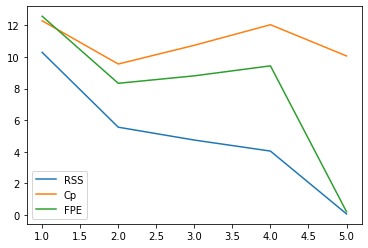

     s        RSS         Cp        FPE
0  1.0  10.295328  12.295328  12.583178
1  2.0   5.558882   9.558882   8.338323
2  3.0   4.744564  10.744564   8.811333
3  4.0   4.046853  12.046853   9.442656
4  5.0   0.068990  10.068990   0.206971

n = 10
σ = 0.5
X:[[1.30240026 1.54030277 0.67125786 0.46130946 1.90390748]
 [1.06313399 1.41335936 0.36921435 1.74855449 1.77205436]
 [0.47636789 1.37823149 0.75234074 0.14884606 0.80147328]
 [0.61097815 0.20155457 0.11585695 0.83084171 1.86028986]
 [0.62052982 1.29952224 0.14173424 0.79198555 0.48667984]
 [1.81861207 0.55963565 0.29907423 0.51763506 1.56928368]
 [0.16733097 0.18394512 1.97131513 0.70276144 1.35551123]
 [1.60736931 1.03110614 0.10635324 1.68707875 1.25689598]
 [0.66801806 1.46672723 0.13022872 1.28142836 1.81973116]
 [0.02836192 0.80699613 1.39879902 0.81619377 1.57506244]]
y:[ 4.78175605  1.78300477  2.3616899   3.59113183 -0.28178668  3.78924333
  4.38459969  1.23665523  3.29466748  4.80658168]
Step №1
---θ1: [2.28118071]
---H1_in

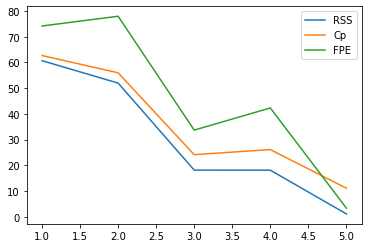

     s        RSS         Cp        FPE
0  1.0  60.704792  62.704792  74.194745
1  2.0  51.990552  55.990552  77.985828
2  3.0  18.152345  24.152345  33.711498
3  4.0  18.137384  26.137384  42.320562
4  5.0   1.123230  11.123230   3.369690

n = 10
σ = 1
X:[[0.26305114 1.72413359 1.99033099 0.22419781 1.11081176]
 [1.35229405 1.57313222 1.86435592 0.10741236 0.9566967 ]
 [0.1191155  1.17620547 1.20492916 1.56716426 0.08024164]
 [0.82140389 0.15559645 1.88595437 1.38590698 1.73313993]
 [1.59130244 0.46601943 1.28696574 0.76315731 0.5218881 ]
 [0.7594027  0.85939215 1.42685599 0.5053311  0.34201874]
 [0.86241569 0.88224017 0.82995343 0.43429938 0.79483034]
 [0.13805836 1.40173071 1.78001124 1.29775897 0.63704905]
 [1.49144467 1.26267309 1.33582981 1.89070925 1.21111224]
 [1.23598054 1.51040676 0.27920199 1.39384514 0.04339004]]
y:[ 5.21451671  3.23018695 -3.45629689  4.29737231  0.36392991  2.75284114
  2.27859981  0.1038844  -0.36777248 -2.31405745]
Step №1
---θ1: [0.98901775]
---H1_inv:

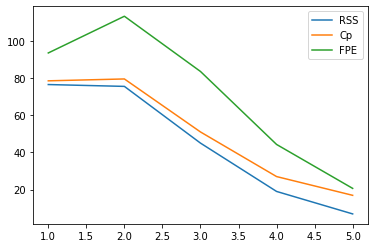

     s        RSS         Cp         FPE
0  1.0  76.454635  78.454635   93.444554
1  2.0  75.461628  79.461628  113.192442
2  3.0  44.956286  50.956286   83.490245
3  4.0  18.957920  26.957920   44.235147
4  5.0   6.867445  16.867445   20.602334

n = 30
σ = 0.1
X:[[0.05627615 1.88088866 0.66332118 0.38676173 1.64083712]
 [0.34263845 1.01288607 1.31402337 0.32674435 0.88217424]
 [1.48125665 0.03547127 1.66171219 1.72460103 0.14749661]
 [1.41041354 1.53776748 1.49273061 0.56713499 0.51281382]
 [0.07942331 1.93429162 0.09563155 1.71062777 1.59756026]
 [1.11152249 0.12635971 0.1599985  0.64389458 1.55012344]
 [0.15252323 1.44643603 0.82618868 0.25649453 0.77763153]
 [1.48782835 0.16905576 0.71615879 0.72698371 1.88205793]
 [1.88566782 1.99422547 0.97736978 0.91639249 0.40432576]
 [1.00698197 1.16208688 1.54222453 0.51055536 0.59271428]
 [1.91578245 1.00161239 0.39077219 1.91227091 1.54950769]
 [0.821151   1.62630347 0.49522878 1.58772312 1.06667612]
 [0.4768347  1.68299403 1.72915302 1.257

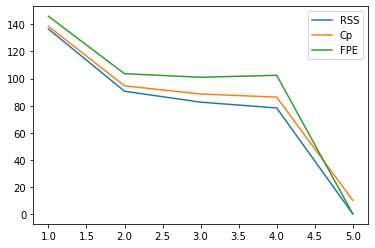

     s         RSS          Cp         FPE
0  1.0  136.546068  138.546068  145.963038
1  2.0   90.640845   94.640845  103.589537
2  3.0   82.609415   88.609415  100.967063
3  4.0   78.321456   86.321456  102.420366
4  5.0    0.186878   10.186878    0.261629

n = 30
σ = 0.5
X:[[0.60628118 0.71705793 1.37446084 0.13451265 1.71663484]
 [1.12694057 1.83987506 1.31798359 1.79649172 0.38412421]
 [1.65013741 0.38659936 0.09814182 0.89681058 0.74885886]
 [1.09590171 0.3107491  1.67931881 1.44848502 1.40207964]
 [1.35668033 1.28049721 1.03784926 1.58298817 0.77676206]
 [0.31863705 1.23031126 0.86735097 0.27518252 1.53973508]
 [1.7810298  0.29680353 0.12224135 0.0897324  0.23427363]
 [1.87605821 0.57552856 0.47026004 1.96906947 1.88297994]
 [1.02740663 1.14706312 1.57804219 0.34129245 0.82932304]
 [0.91227272 0.60316877 0.3797765  1.76265039 1.97874058]
 [0.44035941 1.61648829 1.26723508 1.48898858 0.44323313]
 [1.75557213 0.11795162 1.3255159  1.36720968 1.07662514]
 [0.96047367 1.78788902 1.92

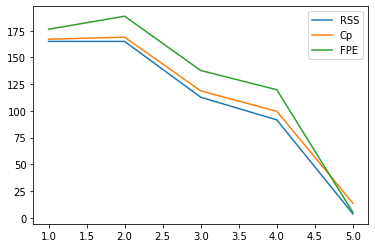

     s         RSS          Cp         FPE
0  1.0  165.048453  167.048453  176.431105
1  2.0  165.004210  169.004210  188.576240
2  3.0  112.753768  118.753768  137.810161
3  4.0   91.599143   99.599143  119.783495
4  5.0    3.571235   13.571235    4.999728

n = 30
σ = 1
X:[[0.69934001 1.51211082 0.79963587 0.31719059 0.37536581]
 [1.63311764 0.2302693  1.68167425 1.19446933 1.84793781]
 [1.57051656 0.5904     0.60496648 1.55969152 0.75426098]
 [1.89057324 0.87288109 1.82295779 0.98377366 1.86792828]
 [1.80732682 1.43644434 1.16867681 1.85842769 0.19959842]
 [1.77113809 1.66663463 1.5827805  1.32317926 1.66082559]
 [1.97716134 1.6065015  0.55712369 0.45870015 1.10459804]
 [0.44838795 0.07539    1.43916056 1.75367951 0.73450362]
 [0.50423586 0.13538951 0.85008629 0.66776743 0.90110904]
 [0.41117072 1.67384414 0.54315969 1.43762502 1.33223549]
 [0.64834348 0.83850743 1.10640867 0.77309003 1.34498413]
 [0.05894294 0.18468801 0.93719567 1.3785438  0.68176251]
 [1.01509658 0.33540565 0.0975

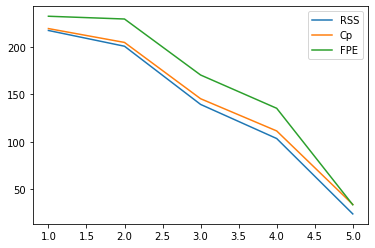

     s         RSS          Cp         FPE
0  1.0  217.352523  219.352523  232.342353
1  2.0  200.752174  204.752174  229.431056
2  3.0  139.450702  145.450702  170.439746
3  4.0  103.521701  111.521701  135.374532
4  5.0   24.106321   34.106321   33.748849

n = 100
σ = 0.1
X:[[0.00338851 1.75452498 0.53929293 1.03675939 0.20202231]
 [1.99939699 0.81198987 0.7356057  0.73751512 1.05097028]
 [1.0680527  0.60652545 1.57706247 0.73251191 0.08147321]
 [0.43238984 0.4137612  0.75097083 0.19512167 0.11860053]
 [1.92512576 1.70162579 1.91262276 1.94328952 0.22453625]
 [1.98048122 1.15250072 0.88095169 0.87971587 0.32657922]
 [0.2217142  0.19426815 0.92678678 0.71931859 1.66493663]
 [0.95858158 0.7616167  1.71200423 0.40900251 0.88209902]
 [0.32813118 1.10760289 0.75934517 1.66488054 1.91192477]
 [1.03715162 0.05716332 1.58828069 0.01109816 1.87977702]
 [0.48764474 1.88665161 1.64246371 0.836534   0.74775265]
 [1.12247497 1.11439928 1.09160231 1.51876072 1.26344361]
 [0.31490713 1.36733192 0.2

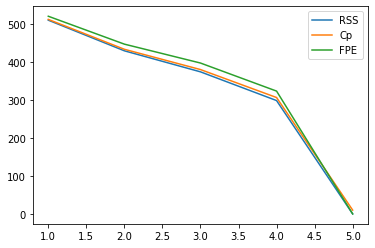

     s         RSS          Cp         FPE
0  1.0  509.693571  511.693571  519.990411
1  2.0  429.199844  433.199844  446.718205
2  3.0  373.959481  379.959481  397.090995
3  4.0  298.517232  306.517232  323.393668
4  5.0    0.816916   10.816916    0.902907

n = 100
σ = 0.5
X:[[1.59846964 0.19277089 1.35230631 1.74586885 1.84981178]
 [0.5465418  1.12394062 0.25731684 0.02101514 1.26054144]
 [0.85885916 0.59227579 1.43125634 1.32783468 0.17305499]
 [0.91029965 0.02052068 0.20938589 1.65893    1.27521879]
 [1.69819709 0.16684082 1.45191543 0.01145606 0.42147757]
 [1.40291413 1.85006588 1.67467766 0.33184721 0.89186475]
 [0.44320637 0.07263891 1.02192236 0.78735831 1.28634428]
 [1.04043259 1.84471086 0.41421315 0.28183484 1.42300276]
 [1.85302941 0.56341928 0.25596482 1.43336723 1.18824419]
 [1.58468974 0.60896486 1.74097832 0.30162609 1.6672755 ]
 [1.929016   0.28748086 0.45762134 1.23996576 0.97185588]
 [1.53176097 1.93883309 1.64932415 1.72426635 1.15422158]
 [1.25651473 0.03618576 1.7

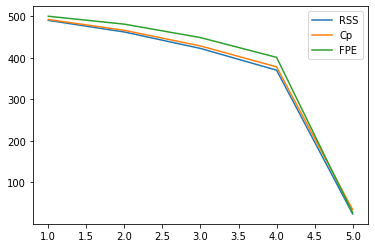

     s         RSS          Cp         FPE
0  1.0  489.976035  491.976035  499.874541
1  2.0  461.979341  465.979341  480.835641
2  3.0  422.422463  428.422463  448.551688
3  4.0  370.121753  378.121753  400.965232
4  5.0   24.374408   34.374408   26.940135

n = 100
σ = 1
X:[[1.55571235e+00 5.06961336e-01 7.40701401e-01 1.54757035e+00
  1.77504663e+00]
 [3.74404304e-02 1.89194050e+00 1.16021214e+00 1.50796383e+00
  1.08869965e+00]
 [4.45482224e-02 1.65355896e+00 7.97831227e-01 6.06831061e-01
  8.41123838e-01]
 [2.90527346e-01 1.50048107e+00 2.35084812e-01 1.39578401e+00
  8.83085494e-01]
 [2.03010653e-01 5.01096041e-02 1.28972896e+00 9.48106936e-01
  1.33261630e+00]
 [1.26707191e+00 7.72546413e-02 9.88337809e-01 8.61467152e-01
  1.35757282e+00]
 [1.40957112e-01 8.91068656e-01 8.58867409e-01 1.12113915e+00
  6.90998378e-01]
 [3.36535557e-01 1.68484054e+00 5.84247065e-01 1.46783952e+00
  1.31751072e+00]
 [1.08887901e+00 1.61993513e+00 4.38946102e-01 1.32378116e+00
  6.31125678e-02]
 [1.6

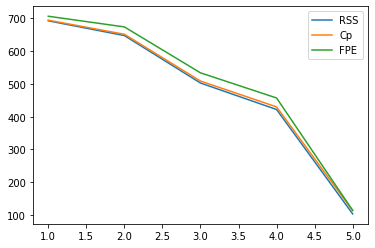

     s         RSS          Cp         FPE
0  1.0  692.507080  694.507080  706.497122
1  2.0  647.507015  651.507015  673.935873
2  3.0  502.722150  508.722150  533.818366
3  4.0  421.900067  429.900067  457.058406
4  5.0  103.222651  113.222651  114.088193



In [6]:
m = 5
n_list = [10, 30, 100]
theta = np.array([0, 0, 1, -2, 3])
sigma_list = [0.1, 0.5, 1]
s = 5
for n in n_list: 
    for sigma in sigma_list:
        X = np.random.uniform(0, 2, size=(n, m))
        ksi = np.random.normal(0, sigma, size=n)
        y =X @ theta + ksi
        print('n = {}'.format(n))
        print('σ = {}'.format(sigma))
        print('X:{}'.format(X))
        print('y:{}'.format(y))
        theta_pred, _, _, df = RMNK(X, y, s=s, printt=True, cr_df=True)
        #p = np.flip(np.arange(m), axis=0)
        #theta_pred, _, _, df = RMNK(X[:,p], y, s=s, printt=True, cr_df=True)
        print('True values: θ= {}'.format(theta))
        print('Estimates: θ*= {}'.format(theta_pred[:,0]))
        plt.plot(df['s'], df['RSS'], label='RSS')
        plt.plot(df['s'], df['Cp'], label='Cp')
        plt.plot(df['s'], df['FPE'], label='FPE')
        plt.legend()
        plt.show()
        print(df)
        print()

        